In [1]:
import numpy as np
import h5py as h5
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import ML_func_defs as ML
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

/home/LoganTheKid/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Prove 03

## Car Evaluation Data

In [2]:
#car_train, car_target = ML.get_car_data(DISPLAY_DATA=False)
car_data = pd.read_csv("car.txt", names=['price','maint_cost', 'doors',
                                         'persons','lug_boot','safety','quality_of_deal'],
                       na_values=["?"])

car_data = np.array( car_data.dropna(axis=0) )

car_train  = np.array( car_data[:,range(0,6)] )
car_target = np.array( car_data[:,6]          )

# Label encoding stuff
price     = {'vhigh':0,'high':1, 'med':2,  'low':3 }
doors     = {    '2':0,   '3':1,   '4':2,'5more':3 }
persons   = {    '2':0,   '4':1,'more':3 }
lug_booty = {'small':0, 'med':1, 'big':2 }
safety    = {  'low':0, 'med':1,'high':2 }
quality   = { 'unacc':0, 'acc':1, 'good':2, 'vgood':3 }

for i,[k0,k1,k2,k3,k4,k5] in enumerate(car_train):
    car_train[i][0] = price[     car_train[i][0] ]
    car_train[i][1] = price[     car_train[i][1] ]
    car_train[i][2] = doors[     car_train[i][2] ]
    car_train[i][3] = persons[   car_train[i][3] ]
    car_train[i][4] = lug_booty[ car_train[i][4] ]
    car_train[i][5] = safety[    car_train[i][5] ]

for i, k in enumerate(car_target):
    car_target[i] = quality[ car_target[i] ] 


# I chose 95% because vgood and good make up only about  ~6% of the data.
# Because of this small percentage the accuracy will change everytime you run it. 
X_train, X_test, y_train, y_test = train_test_split(car_train, car_target, train_size= 0.95)
X_train = X_train.astype('int')
y_train = y_train.astype('int')
X_test = X_test.astype('int')
y_test = y_test.astype('int')

clsfr = KNeighborsClassifier(n_neighbors=3)
clsfr.fit(X_train, y_train)
y_pred = clsfr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8620689655172413


/home/LoganTheKid/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


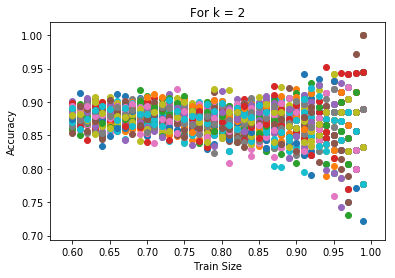

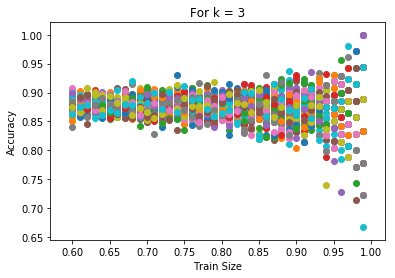

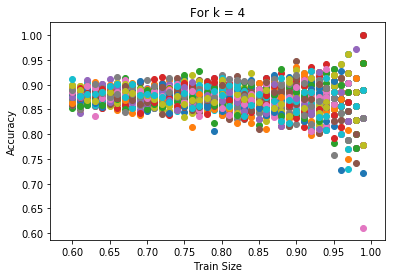

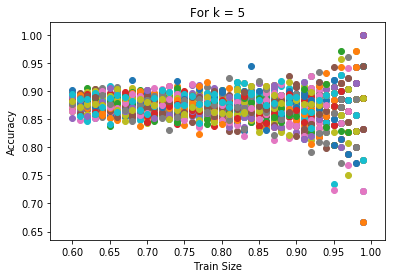

In [3]:
# Due to the variablity we'll explore what happens when we runn it a few times
for knn in np.arange(2,6):
    for just_an_iter in np.arange(50):
        acc = []
        for tr_sz in np.linspace(.6, .99, 40):
            X_train, X_test, y_train, y_test = train_test_split(car_train, car_target, 
                                                                train_size=tr_sz, test_size=1-tr_sz)
            X_train = X_train.astype('int')
            y_train = y_train.astype('int')
            X_test = X_test.astype('int')
            y_test = y_test.astype('int')

            clsfr = KNeighborsClassifier(n_neighbors=3)
            clsfr.fit(X_train, y_train)
            y_pred = clsfr.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            acc.append( accuracy )

        plt.figure(knn)
        plt.scatter(np.linspace(.6, .99, 40), acc)

    plt.title( 'For k = ' + str(knn) )
    plt.xlabel("Train Size")
    plt.ylabel("Accuracy")
    plt.show()


## Automobile MPG Data

There's a lot of varience from run-to-run, but it looks like $k>10$ is an okay bet and $k>20$ decent bet for a lower strandard deviation. 

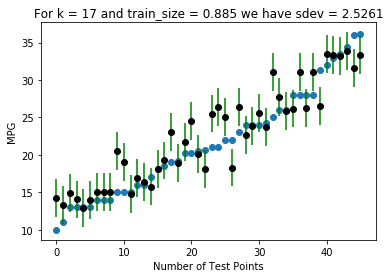

In [5]:
# *** Loud groan of pain ***  (because of the preprocessing stuff)
MY_STANDARDS = 2.8 # you decide how good of results you want to see plotted. 
RANGE_OF_KNN = np.arange(1,30) # for post analysis stuff
TRAINING_SIZE= np.linspace(.6,.9,41) # also for post analysis stuff

gross_file = open('auto-mpd.txt','r')
ugly_lines = gross_file.readlines()

mpg = []
cylinders = []
displacement = []
horsepower = []
weight = []
acceleration = []
model_year = []
origin = [] 
car_name = []

for lin in ugly_lines:
    # The if gets rid of missing data now
    if lin.split('      ')[1] != '?':
        mpg.append( float(lin.split('  ')[0]) )
        cylinders.append( int( lin.split('   ')[1] ) )
        displacement.append( float( lin.split('   ')[2] ) )
        horsepower.append( float( lin.split('      ')[1] ) )
        weight.append( float( lin.split('      ')[2] ) )
        acceleration.append( float( lin.split('      ')[3].split('   ')[0] ) )
        model_year.append( int( lin.split('      ')[3].split('   ')[1].split('  ')[0] ) )
        origin.append( int( lin.split('      ')[3].split('   ')[1].split('  ')[1].split('\t')[0] ) )
        car_name.append( lin.split('"')[1] )
        

auto_data = pd.DataFrame( {#'mpg':          mpg         ,
                           'cylinders':    cylinders   , 
                           'displacement': displacement,
                           'horsepower':   horsepower  ,
                           'weight':       weight      ,
                           'acceleration': acceleration,
                           'model_year':   model_year  ,
                           'origin':       origin      ,
                           'car_name':     car_name     
                           } )

# the string car_name into an integer
auto_data.car_name.value_counts()
auto_data.car_name = auto_data.car_name.astype('category')
auto_data['car_name_cat'] = auto_data.car_name.cat.codes
auto_data = auto_data.drop( labels = "car_name" , axis=1)

auto_train  = np.array( auto_data )
auto_target = np.array( mpg )

eff_test = {} # efficiency test dictionary
for knn in RANGE_OF_KNN:
    eff_test[str(knn)] = []
    for tr_sz in TRAINING_SIZE:

        X_train, X_test, y_train, y_test = train_test_split(auto_train, 
                                                            auto_target, 
                                                            train_size=tr_sz,
                                                            test_size=1-tr_sz)
        X_train = X_train.astype('float')
        y_train = y_train.astype('float')
        X_test = X_test.astype('float')
        y_test = y_test.astype('float')

        clsfr = KNeighborsRegressor(n_neighbors=knn)
        clsfr.fit(X_train, y_train)
        y_pred = clsfr.predict(X_test)

        diff = y_test - y_pred
        sdev = np.std(diff) 
        eff_test[str(knn)].append(sdev)
        index = np.argsort( y_test )
        
        if sdev < MY_STANDARDS:
            plt.figure(knn)
            plt.scatter(np.arange(len(y_test)), y_test[index] )
            plt.errorbar(np.arange(len(y_pred)), y_pred[index], yerr=sdev, fmt='o', color='k',ecolor='g')
            plt.title( 'For k = ' + str(knn) + ' and train_size = %.3f we have sdev = %.4f' %(tr_sz, sdev) )
            plt.xlabel("Number of Test Points")
            plt.ylabel("MPG")
            plt.show()

Run the cell below to see the trend.

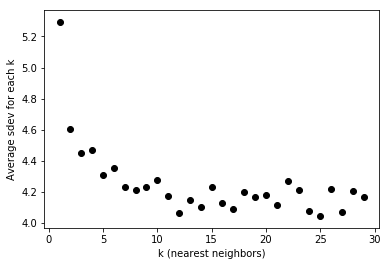

In [6]:
avg_sdev = [ sum(eff_test[str(x)])/len(eff_test[str(x)]) for x in RANGE_OF_KNN ]
plt.figure('new')
plt.scatter(RANGE_OF_KNN, avg_sdev, color='k')
plt.xlabel('k (nearest neighbors)')
plt.ylabel('Average sdev for each k')
plt.show()

## Student Performance

### Subject - Math

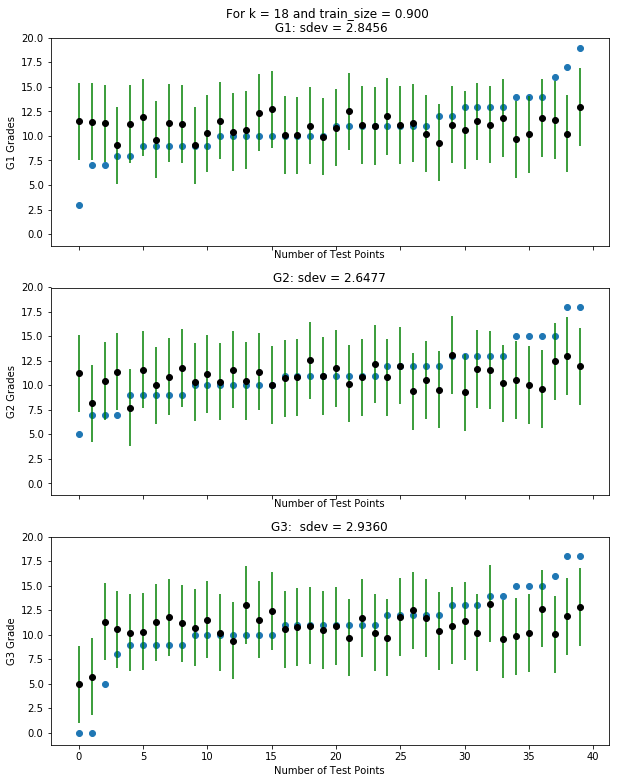

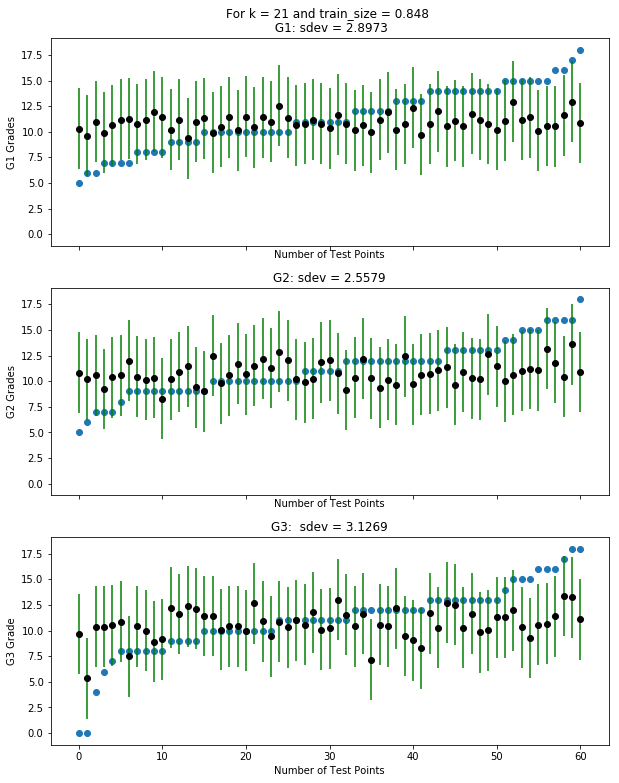

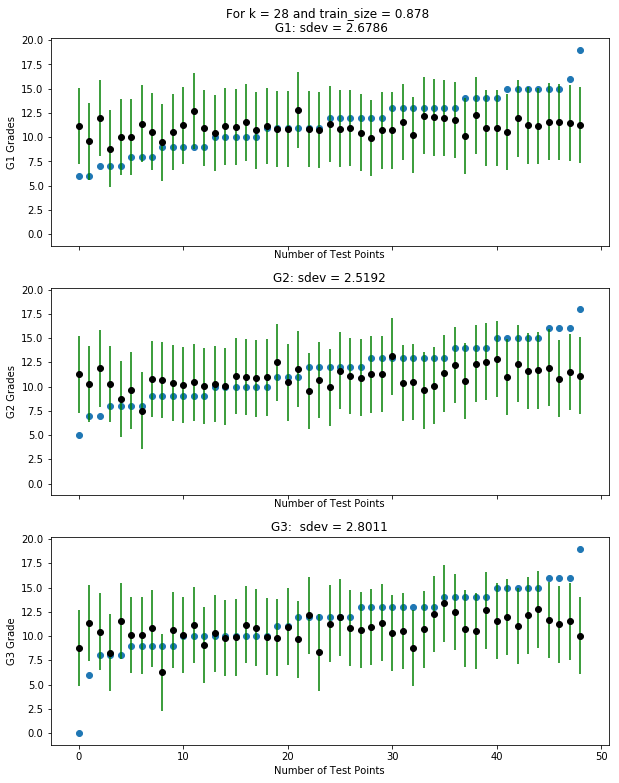

In [9]:
MY_STANDARDS = 2.9 # you decide how good of results you want to see plotted. 
RANGE_OF_KNN = np.arange(1,30) # for post analysis stuff
TRAINING_SIZE= np.linspace(.6,.9,41) # also for post analysis stuff

math_data = pd.read_csv("student-mat.csv", sep=';')

# Label encoding stuff
cat_data = ['school','sex','address','Mjob','Fjob','reason','guardian',
            'schoolsup','famsize','Pstatus','famsup','paid','activities',
            'nursery','higher','internet','romantic']
# nifty way to do it all at once. 
for i in cat_data:
    code1 = 'math_data.'+i+'.value_counts()'
    code2 = "math_data."+i+" = math_data."+i+".astype('category')"
    code3 = 'math_data["'+i+'_cat"] = math_data.'+i+'.cat.codes'
    code4 = 'math_data = math_data.drop( labels = "'+i+'" , axis=1)'
    exec(code1)
    exec(code2)
    exec(code3)
    exec(code4)   
#print(math_data.keys())    # it works - yay

target = [ math_data.G1, math_data.G2, math_data.G3 ]
target = np.transpose( np.array( target ) ) 

math_data = math_data.drop( labels = "G1" , axis=1)
math_data = math_data.drop( labels = "G2" , axis=1)
math_data = math_data.drop( labels = "G3" , axis=1)
train = np.array( math_data )

eff_test = {} # efficiency test dictionary
for knn in RANGE_OF_KNN:
    eff_test[str(knn)] = {'G1':[], 'G2':[], 'G3': []}
    for tr_sz in TRAINING_SIZE:

        X_train, X_test, y_train, y_test = train_test_split(train, target, 
                                                            train_size=tr_sz,
                                                            test_size=1-tr_sz)
        X_train = X_train.astype('float')
        y_train = y_train.astype('float')
        X_test = X_test.astype('float')
        y_test = y_test.astype('float')

        clsfr = KNeighborsRegressor(n_neighbors=knn)
        clsfr.fit(X_train, y_train)
        y_pred = clsfr.predict(X_test)
        
        y_test_G1, y_test_G2, y_test_G3 = y_test[:,0], y_test[:,1], y_test[:,2]
        y_pred_G1, y_pred_G2, y_pred_G3 = y_pred[:,0], y_pred[:,1], y_pred[:,2]
        diff_G1, diff_G2, diff_G3 = y_test_G1-y_pred_G1, y_test_G2-y_pred_G2, y_test_G3-y_pred_G3
        sdev_G1, sdev_G2, sdev_G3 = np.std(diff_G1), np.std(diff_G2), np.std(diff_G3)
        eff_test[str(knn)]['G1'].append(sdev_G1)
        eff_test[str(knn)]['G2'].append(sdev_G2)
        eff_test[str(knn)]['G3'].append(sdev_G3)
        i_G1, i_G2, i_G3 = np.argsort(y_test_G1), np.argsort(y_test_G2), np.argsort(y_test_G3)
        
        # Ooooo Fancy
        if (sdev_G1+sdev_G2+sdev_G3)/3 < MY_STANDARDS:
            f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(10,13))
            
            ax1.scatter(np.arange(len(y_test_G1)), y_test_G1[i_G1] )
            ax1.errorbar(np.arange(len(y_pred_G1)), y_pred_G1[i_G1], yerr=sdev, fmt='o', color='k',ecolor='g')
            ax1.set_title('For k = ' + str(knn) + ' and train_size = %.3f \n G1: sdev = %.4f' %(tr_sz, sdev_G1))
            ax1.set_xlabel("Number of Test Points")
            ax1.set_ylabel("G1 Grades")

            ax2.scatter(np.arange(len(y_test_G2)), y_test_G2[i_G2] )
            ax2.errorbar(np.arange(len(y_pred_G2)), y_pred_G2[i_G2], yerr=sdev, fmt='o', color='k',ecolor='g')
            ax2.set_title( 'G2: sdev = %.4f' %(sdev_G2) )
            ax2.set_xlabel("Number of Test Points")
            ax2.set_ylabel("G2 Grades")
            
            ax3.scatter(np.arange(len(y_test_G3)), y_test_G3[i_G3] )
            ax3.errorbar(np.arange(len(y_pred_G3)), y_pred_G3[i_G3], yerr=sdev, fmt='o', color='k',ecolor='g')
            ax3.set_title( 'G3:  sdev = %.4f' %(sdev_G3) )
            ax3.set_xlabel("Number of Test Points")
            ax3.set_ylabel("G3 Grade")
            
            plt.show()
            print("\n \n \n \n \n \n \n") # makes the separtion of graphs more clear

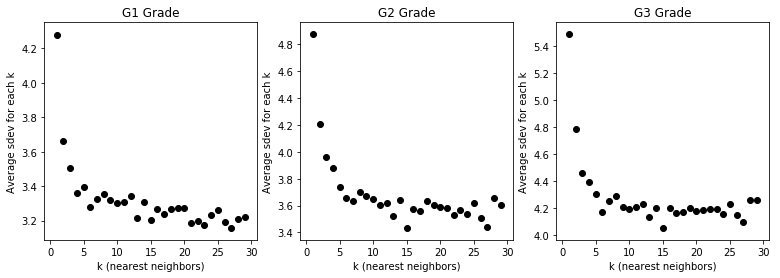

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=False, figsize=(13,4))

avg_sdev_G1 = [ sum(eff_test[str(x)]['G1'])/len(eff_test[str(x)]['G1']) for x in RANGE_OF_KNN ]
ax1.scatter(RANGE_OF_KNN, avg_sdev_G1, color='k')
ax1.set_title('G1 Grade')
ax1.set_xlabel('k (nearest neighbors)')
ax1.set_ylabel('Average sdev for each k')

avg_sdev_G2 = [ sum(eff_test[str(x)]['G2'])/len(eff_test[str(x)]['G2']) for x in RANGE_OF_KNN ]
ax2.scatter(RANGE_OF_KNN, avg_sdev_G2, color='k')
ax2.set_title( 'G2 Grade' )
ax2.set_xlabel('k (nearest neighbors)')
ax2.set_ylabel('Average sdev for each k')

avg_sdev_G3 = [ sum(eff_test[str(x)]['G3'])/len(eff_test[str(x)]['G3']) for x in RANGE_OF_KNN ]
ax3.scatter(RANGE_OF_KNN, avg_sdev_G3, color='k')
ax3.set_title( 'G3 Grade' )
ax3.set_xlabel('k (nearest neighbors)')
ax3.set_ylabel('Average sdev for each k')

plt.show()

### Subject - Portuguese

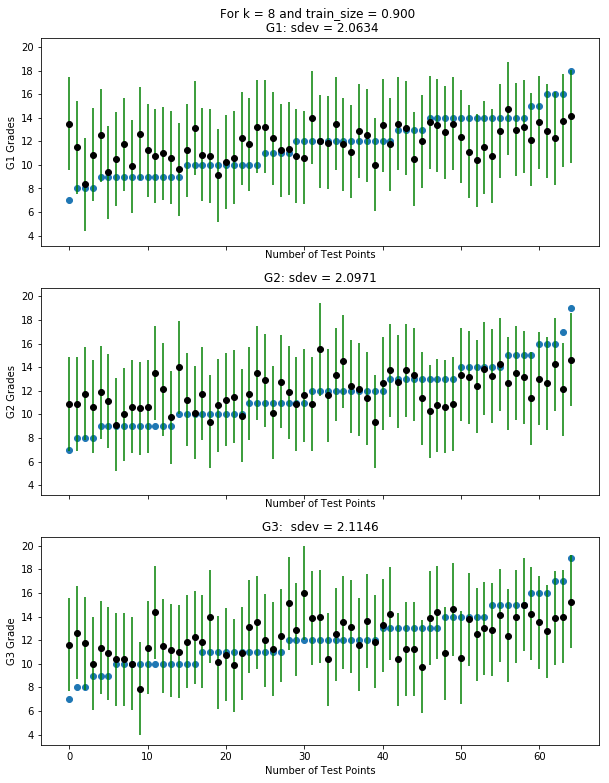

In [16]:
MY_STANDARDS = 2.125 # you decide how good of results you want to see plotted. 
RANGE_OF_KNN = np.arange(1,30) # for post analysis stuff
TRAINING_SIZE= np.linspace(.6,.9,41) # also for post analysis stuff

math_data = pd.read_csv("student-por.csv", sep=';')

# Label encoding stuff
cat_data = ['school','sex','address','Mjob','Fjob','reason','guardian',
            'schoolsup','famsize','Pstatus','famsup','paid','activities',
            'nursery','higher','internet','romantic']
# nifty way to do it all at once. 
for i in cat_data:
    code1 = 'math_data.'+i+'.value_counts()'
    code2 = "math_data."+i+" = math_data."+i+".astype('category')"
    code3 = 'math_data["'+i+'_cat"] = math_data.'+i+'.cat.codes'
    code4 = 'math_data = math_data.drop( labels = "'+i+'" , axis=1)'
    exec(code1)
    exec(code2)
    exec(code3)
    exec(code4)
#print(math_data.keys())    # it works - yay

target = [ math_data.G1, math_data.G2, math_data.G3 ]
target = np.transpose( np.array( target ) ) 

math_data = math_data.drop( labels = "G1" , axis=1)
math_data = math_data.drop( labels = "G2" , axis=1)
math_data = math_data.drop( labels = "G3" , axis=1)
train = np.array( math_data )

eff_test = {} # efficiency test dictionary
for knn in RANGE_OF_KNN:
    eff_test[str(knn)] = {'G1':[], 'G2':[], 'G3': []}
    for tr_sz in TRAINING_SIZE:

        X_train, X_test, y_train, y_test = train_test_split(train, target, 
                                                            train_size=tr_sz,
                                                            test_size=1-tr_sz)
        X_train = X_train.astype('float')
        y_train = y_train.astype('float')
        X_test = X_test.astype('float')
        y_test = y_test.astype('float')

        clsfr = KNeighborsRegressor(n_neighbors=knn)
        clsfr.fit(X_train, y_train)
        y_pred = clsfr.predict(X_test)
        
        y_test_G1, y_test_G2, y_test_G3 = y_test[:,0], y_test[:,1], y_test[:,2]
        y_pred_G1, y_pred_G2, y_pred_G3 = y_pred[:,0], y_pred[:,1], y_pred[:,2]
        diff_G1, diff_G2, diff_G3 = y_test_G1-y_pred_G1, y_test_G2-y_pred_G2, y_test_G3-y_pred_G3
        sdev_G1, sdev_G2, sdev_G3 = np.std(diff_G1), np.std(diff_G2), np.std(diff_G3)
        eff_test[str(knn)]['G1'].append(sdev_G1)
        eff_test[str(knn)]['G2'].append(sdev_G2)
        eff_test[str(knn)]['G3'].append(sdev_G3)
        i_G1, i_G2, i_G3 = np.argsort(y_test_G1), np.argsort(y_test_G2), np.argsort(y_test_G3)
        
        # Ooooo Fancy
        if (sdev_G1+sdev_G2+sdev_G3)/3 < MY_STANDARDS:
            f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(10,13))
            
            ax1.scatter(np.arange(len(y_test_G1)), y_test_G1[i_G1] )
            ax1.errorbar(np.arange(len(y_pred_G1)), y_pred_G1[i_G1], yerr=sdev, fmt='o', color='k',ecolor='g')
            ax1.set_title('For k = ' + str(knn) + ' and train_size = %.3f \n G1: sdev = %.4f' %(tr_sz, sdev_G1))
            ax1.set_xlabel("Number of Test Points")
            ax1.set_ylabel("G1 Grades")

            ax2.scatter(np.arange(len(y_test_G2)), y_test_G2[i_G2] )
            ax2.errorbar(np.arange(len(y_pred_G2)), y_pred_G2[i_G2], yerr=sdev, fmt='o', color='k',ecolor='g')
            ax2.set_title( 'G2: sdev = %.4f' %(sdev_G2) )
            ax2.set_xlabel("Number of Test Points")
            ax2.set_ylabel("G2 Grades")
            
            ax3.scatter(np.arange(len(y_test_G3)), y_test_G3[i_G3] )
            ax3.errorbar(np.arange(len(y_pred_G3)), y_pred_G3[i_G3], yerr=sdev, fmt='o', color='k',ecolor='g')
            ax3.set_title( 'G3:  sdev = %.4f' %(sdev_G3) )
            ax3.set_xlabel("Number of Test Points")
            ax3.set_ylabel("G3 Grade")
            
            plt.show()
            print("\n \n \n \n \n \n \n") # makes the separtion of graphs more clear

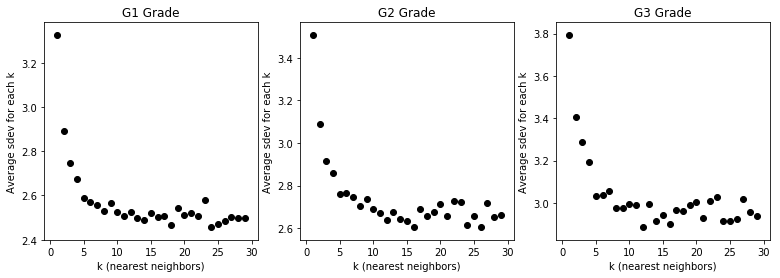

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=False, figsize=(13,4))

avg_sdev_G1 = [ sum(eff_test[str(x)]['G1'])/len(eff_test[str(x)]['G1']) for x in RANGE_OF_KNN ]
ax1.scatter(RANGE_OF_KNN, avg_sdev_G1, color='k')
ax1.set_title('G1 Grade')
ax1.set_xlabel('k (nearest neighbors)')
ax1.set_ylabel('Average sdev for each k')

avg_sdev_G2 = [ sum(eff_test[str(x)]['G2'])/len(eff_test[str(x)]['G2']) for x in RANGE_OF_KNN ]
ax2.scatter(RANGE_OF_KNN, avg_sdev_G2, color='k')
ax2.set_title( 'G2 Grade' )
ax2.set_xlabel('k (nearest neighbors)')
ax2.set_ylabel('Average sdev for each k')

avg_sdev_G3 = [ sum(eff_test[str(x)]['G3'])/len(eff_test[str(x)]['G3']) for x in RANGE_OF_KNN ]
ax3.scatter(RANGE_OF_KNN, avg_sdev_G3, color='k')
ax3.set_title( 'G3 Grade' )
ax3.set_xlabel('k (nearest neighbors)')
ax3.set_ylabel('Average sdev for each k')

plt.show()